# Overview

This notebook is to obtain posts in [r/streetphotography](https://old.reddit.com/r/streetphotography/) using PRAW python API from reddit 

## Goal

- Initialize PRAW object
- Obtain posts on r/streetphotography
- Create functions to eaily obtain posts for future notebook

### Import Libraries

In [1]:
import os
from urllib.request import urlopen
import io
import numpy as np
from colorthief import ColorThief

from src.photo_tools import reddit_tools
from src.photo_tools import palette_tools

import webcolors
import matplotlib.pyplot as plt
%matplotlib inline

### Initializing imports

In [2]:
agent_name = "photo_color_analyzer"
reddit = reddit_tools(agent_name)
pl = palette_tools()

In [41]:
df = reddit.get_top_posts("streetphotography", time="year", limit=6)

#### Ensure URL contains image

Some urls may contain a reddit album which requires web scraping to pull values. In the interest of time, I will be only dealing with .jpg extensions

In [42]:
df["is_img"] = df.url.apply(lambda x: 1 if x[-3:] == "jpg" else np.nan)
df.dropna(inplace = True)

In [43]:
df.head()

,title,url,is_img
0,Salaryman pedestrian in Shinjuku,https://i.redd.it/n8icfynpv2v41.jpg,1
1,Food Trailer at 5 AM.,https://i.redd.it/g05ify9ubo851.jpg,1
2,"Get home quickly ☔️ Seoul, South Korea 2020 Mo...",https://i.redd.it/mv24dw5akcf51.jpg,1
3,Morning tea on the street of Delhi,https://i.redd.it/7jiehpzmttk51.jpg,1
4,Spiderman at NYC Protests,https://i.redd.it/jkql2nxgei451.jpg,1


In [44]:
df["rgb_palette"] = df.url.apply(pl.get_palette)

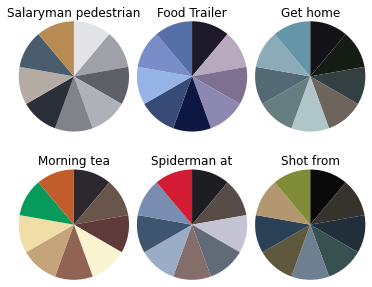

In [45]:
fig, ax = plt.subplots(2, 3, figsize=(6,5))

for i in range(0, df.shape[0]):
    col = i%3
    row = i//3
    plot_df = df.iloc[i,:]
    
    wedges = [1] * len(plot_df.rgb_palette)
    sorted_color = pl.palette_sort(plot_df.rgb_palette)
    color = pl.rgb_hex_list(sorted_color)
    
    ax[row, col].pie(wedges, colors=color, startangle=90, counterclock=False, radius=1.4);
    ax[row, col].set_title(" ".join(plot_df.title.split()[:2]), pad=10)


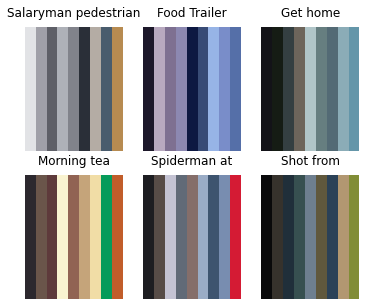

In [46]:
fig, ax = plt.subplots(2, 3, figsize=(6,5))

for i in range(0, df.shape[0]):
    col = i%3
    row = i//3
    plot_df = df.iloc[i,:]
    width = 1
    
    x = range(len(plot_df.rgb_palette))
    y = [width] * len(plot_df.rgb_palette)
    color = pl.rgb_hex_list(plot_df.rgb_palette)
    
    axe = ax[row, col]
    
    axe.bar(x,y, color=color, width=width);
    axe.set_title(" ".join(plot_df.title.split()[:2]), pad=10)
    axe.xaxis.set_visible(False)
    axe.yaxis.set_visible(False)
    axe.set_xlim(-(width/2), (len(x)-(width/2)))
    axe.set_ylim(0,1)
    axe.axis("off")